# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
#Q1 Part 1
import pandas as pd
import numpy as np

df = pd.read_csv("/content/airbnb_hw.csv")

# price column name
var = "Price"

print(df[var].unique())
print(df[var].dtype)



# remove commas then convert to numeric
df[var] = df[var].str.replace(",", "",)
df[var] = pd.to_numeric(df[var], errors="coerce")

# total missing values
missing_price = df[var].isna().sum()
print("Missing Prices after cleaning:", missing_price)

"""
Explanation: Using unique and dtype methods we see that values above 999
have commas and the values are stored as objects. Prices are quantitative
so we have to coerce them into numerics but in order to do that we have to
remove the commas so it will allow pandas to do so

"""


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

'\nExplanation: Using unique and dtype methods we see that values above 999\nhave commas and the values are stored as objects. Prices are quantitative \nso we have to coerce them into numerics but in order to do that we have to \nremove the commas so it will allow pandas to do so\n\n'

In [ ]:
#Q1 Part 2

import pandas as pd
import numpy as np

df = pd.read_csv("/content/mn_police_use_of_force.csv")


var = "subject_injury"

# make sure all missing values are of type nan
df[var] = df[var].replace(["", " ", "NA", "N/A", "None", "Unknown"], np.nan)


# proportion missing
missing_prop = df[var].isna().mean()
print("Proportion missing:", missing_prop)

"""
We see that over 3/4th's of the values are missing which is a cause for concern
as you would not be able to draw reliable conclusions about the column unless
there is a good reason on why those values are missing

"""

# Crosstab
print(pd.crosstab(df["force_type"], df[var], dropna=False))

"""
There are majority missing values for majority of the force types with most of
them being concentrated around force types that, in general had a lot of instances

"""



Proportion missing: 0.7619342359767892
subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


In [ ]:
#Q1 Part 3

df = pd.read_parquet("/content/justice_data.parquet")

# change verbose variable name to something easier
df = df.rename(columns={"WhetherDefendantWasReleasedPretrial": "Released_Pretrial"})

var = "Released_Pretrial"

#finding column number to look in codebook
print(df.columns.get_loc(var))

#summing literal missing values
print(df[var].isna().sum())

#finding what values occur
print(df[var].unique())

# Replaces 9's (coded missing values) with nan
df[var] = df[var].replace(9, np.nan)

# Convert to numeric
df[var] = pd.to_numeric(df[var], errors="coerce")

# Check cleaned values
print(df[var].value_counts(dropna=False))

12
0
[9 0 1]
Released_Pretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


In [ ]:
#Q1 Part 4

import pandas as pd
import numpy as np

df = pd.read_parquet("/content/justice_data.parquet")

# Rename long variable name
df = df.rename(columns={"ImposedSentenceAllChargeInContactEvent": "Sentence_Imposed"})

#making it easier so don't have to copy all that every time
var = "Sentence_Imposed"
sentence_type = "SentenceTypeAllChargesAtConvictionInContactEvent"

print(df[var].unique())

#finding column numbers to find meanings in codebook
print(df.columns.get_loc(var))
print(df.columns.get_loc(sentence_type))

# if the sentence type in an instance is 4 or 9 (representing NA), replace with nan
df[var] = df[var].where(~df[sentence_type].isin([4, 9]), np.nan)

#turning blank spaces into nan's
df[var] = df[var].replace(r"^\s*$", np.nan, regex=True)

#check
print(df[var].unique())



"""
Explanation: After checking the codebook, it was found that the sentence type for
that was represented by 4's and 9's were missing or NA, therefore the sentence length
should be changed to nan for those instances. Using unique we also see there are values
that are blank spaces which we need to turn into nan's.
"""



[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

"\nExplanation: After checking the codebook, it was found that the sentence type for\nthat was represented by 4's and 9's were missing or NA, therefore the sentence length\nshould be changed to nan for those instances. Using unique we also see there are values\nthat are blank spaces which we need to turn into nan's.\n"

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Index([], dtype='object')


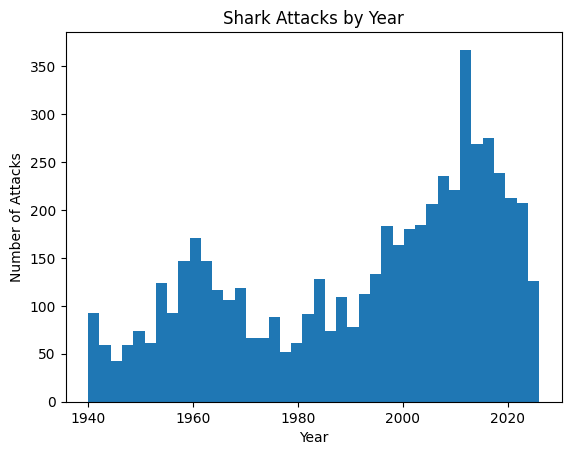

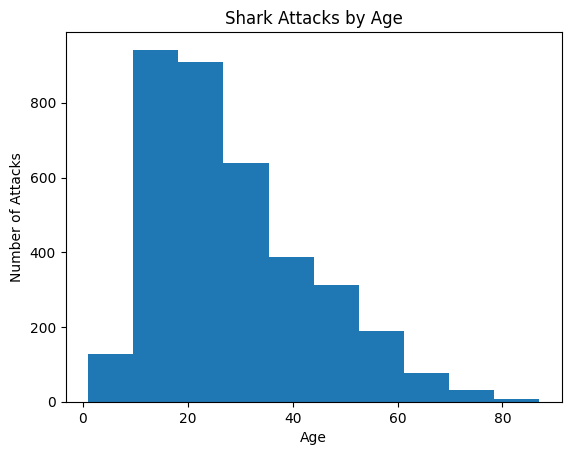

724
724
Proportion of attacks that are unprovoked: 0.8874058127018299
Proportion of provoked attacks that ended in fatality 0.02529182879377432
Proportion of unprovoked attacks that ended in fatality 0.17031211599901697
Proportion of male attacks that ended in fatality 0.16389784279692537
Proportion of female attacks that ended in fatality 0.13834586466165413
Proportion of attacks by white sharks: 0.19479015918958031


In [61]:
#Q2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("/content/GSAF5.xls")
#Part 2

#turn all empty/missing data forms into nan objects
df = df.replace(r'^\s*$', np.nan, regex=True)

#Finding which columns don't have any data
print(df.columns[df.isna().all()]) #ouput: 0

#Part 3

var = "Year"

#checking for unintelligible data
(df[var].unique())
df[var].dtype

"""
The range is from 0-2026. Looking at the table we see hints in the date column,
with the 0 values in the year column being associated with either a range of
years or simply before xxxx. You could take a guess of the specific year but for
the purpose of the assignment that would be impractical so I'll turn them into
nan's
"""
#turning 0's into nan's
df[var].replace(0, np.nan)


#focusing rows onto 1940-present
df = df[ df[var] >= 1940 ]

#creating histogram to see trend over time
plt.hist(df[var], bins=40)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Year")
plt.show()

"""
In general there is a slight increasing trend overall, with a clear increasing
trend from 2000 to early 2010's, but since then there has been a decreasing trend

"""

#Part 4

var = "Age"

df[var].unique()

# turning age's into numerics which sets all invalid inputs into nan's
df[var] = pd.to_numeric(df[var], errors = "coerce")

#check
df[var].unique()

#histogram of ages
plt.hist(df[var], bins = 10)
plt.xlabel("Age")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Age")
plt.show()

#Part 5

var = "Sex"

#checking what values dealing with
df[var].unique()



# Standardizing the M's and F's
df[var] = df[var].str.strip().str.upper()

#replace rest of junk data with nan
df[var] = df[var].replace(["LLI", "M X 2"], pd.NA)

#replace "NAN" with actual nan value
df[var] = df[var].replace("NAN", pd.NA)

df[var].unique()

#count M's
M_count = (df[var] == "M").sum()
F_count = M_count = (df[var] == "F").sum()

print(M_count)
print(F_count)

"""
The ratio for male to female is 1:1. If you count the row that had M x 2 with the
Assumption that means 2 males, then the ratio would be 726:724

"""

#Part 6

var = "Type"

df[var].unique()

# removing space, uppercasing everything
df[var] = df[var].str.strip().str.upper()

# change nan
df[var] = df[var].fillna("UNKNOWN")

# changing all other unknown values to "UNKNOWN"
df[var] = df[var].replace(['QUESTIONABLE', 'WATERCRAFT',
       'SEA DISASTER', '?', 'UNCONFIRMED', 'UNVERIFIED', 'INVALID',
       'UNDER INVESTIGATION', 'BOAT'], "UNKNOWN")

unprov_count = (df[var] == "UNPROVOKED").sum()
prov_count = (df[var] == "PROVOKED").sum()
unkown_count = (df[var] == "UNKNOWN").sum()

total_known_attacks = unprov_count+prov_count


print("Proportion of attacks that are unprovoked:", unprov_count/total_known_attacks)

#Part 7

var = "Fatal Y/N"

df[var].unique()

# removing space, uppercasing everything
df[var] = df[var].str.strip().str.upper()



# change nan
df[var] = df[var].fillna("UNKNOWN")

# changing all other unknown values to "UNKNOWN"
df[var] = df[var].replace(['F', 'M','NQ', 'UNKNOWN', 'Y X 2'], "UNKNOWN")

#Part 8

#creating df with only unprovoked attacks
unprov_df = df[df["Type"] == "UNPROVOKED"]

#More likely for unprovoked attack to be on man
unprov_df["Sex"].value_counts()

#creating df with provoke attacks
prov_df = df[df["Type"] == "PROVOKED"]

#calculating proportion of deaths when provoked
prov_df["Fatal Y/N"].value_counts()
prov_fatalities = prov_df["Fatal Y/N"].value_counts()["Y"]
prov_survivors = prov_df["Fatal Y/N"].value_counts()["N"]
total_attacks_prov = prov_fatalities + prov_survivors

print("Proportion of provoked attacks that ended in fatality", prov_fatalities/total_attacks_prov)

#calculating proportion of deaths when unprovoked
unprov_df["Fatal Y/N"].value_counts()
unprov_fatalities = unprov_df["Fatal Y/N"].value_counts()["Y"]
unprov_survivors = unprov_df["Fatal Y/N"].value_counts()["N"]
total_attacks_unprov = unprov_fatalities + unprov_survivors

print("Proportion of unprovoked attacks that ended in fatality", unprov_fatalities/total_attacks_unprov)

#the attack is more likely to be fatal when unprovoked

# filtering for males
df_males = df[df["Sex"] == "M"]

male_fatalities = df_males["Fatal Y/N"].value_counts()["Y"]
male_survivors = df_males["Fatal Y/N"].value_counts()["N"]
total_males = male_fatalities + male_survivors

print("Proportion of male attacks that ended in fatality", male_fatalities/total_males)

# filtering for females
df_females = df[df["Sex"] == "F"]

female_fatalities = df_females["Fatal Y/N"].value_counts()["Y"]
female_survivors = df_females["Fatal Y/N"].value_counts()["N"]
total_females = female_fatalities + female_survivors

print("Proportion of female attacks that ended in fatality", female_fatalities/total_females)

#more likely for attacks to be fatal when male

"""
How do you feel about sharks?
So-So. Pretty dangerous but kinda cool
"""


#Part 9

#hidden space
df.columns = df.columns.str.strip()

var = "Species"



# make species uppercase strings
df[var] = df[var].astype("string").str.upper()

# keep rows with known species
known_species = df[df[var].notna()]

# identify rows that contain the word "WHITE"
is_white = known_species[var].str.split().apply(lambda x: "WHITE" in x)

# counts
white_count = is_white.sum()
total_known = len(known_species)

# proportion
prop_white = white_count / total_known

print("Proportion of attacks by white sharks:", prop_white)

























**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The main idea is about "tidying" data as it is a crucial part of data cleaning. When data follows a consistent structure in that: each variable is a column, each observation is a row and each type of observational unit is its own table, the data is a lot easeier to work with. Keeping data in this structure allows for more time analyzing rather than structuring.
2. The tiny data standards intent is to make the first round of cleaning quicker and make it easy to access and use data for different means.
3. The first sentence means that there are a lot of ways to deviate away from the tidy dataset standard but really only one structure that satisfies it. The second sentence means that various contexts can change how you define what count's as a variable.
4. Values are the actual entries in the dataset, variable is a set of values that measure the same attribute and
5.
6.
7.
8.